In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Problem 1
Sample t-test for testing for the differences in means: Independent t-test
Load and explore the data

In [2]:
A=pd.Series([3397,5609,3149,4985,2254,4086,3480,3797,2370,3942,2472,4445])
B=pd.Series([2935,259,1500,2435,3873,1035,2965,2752,1095,1593,4091,1617])

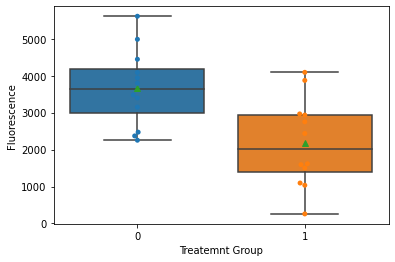

In [3]:
# 1. Plot the data to visualize
ax=sns.boxplot(data=[A,B],showmeans=True)
ax.set(xlabel="Treatemnt Group")
ax.set(ylabel="Fluorescence")
ax.set(xticklabels=["Tumor","Normal Tissue"])
ax=sns.swarmplot(data=[A,B])

Symmetrical distributions, noraml in appearance, equal variance in appearance.  

In [4]:
A.describe()

count      12.000000
mean     3665.500000
std      1038.566626
min      2254.000000
25%      2979.750000
50%      3638.500000
75%      4175.750000
max      5609.000000
dtype: float64

Since we're not working with a dataframe in this example you can use the built-in numpy functions to calcualte the mean and standard deviation of our sample. By default numpy uses a maximum likelihood estimate for the standard deviation (degrees of freedom (DF) = n so ddof=0), so to have it do the unbiased estimation we set the ddofparameter = 1 (). Note that this is different than what pandas does. By default pandas uses ddof=1.

In [5]:
# standard error use ddof n-1
stdB=np.std(B,ddof=1)
stdA=np.std(A,ddof=1)
print(stdA)
print(stdB)

1038.5666258664567
1183.1794479539465


In [6]:
# variance = standard deviation ^2
stdB**2

1399913.6060606055

In [7]:
stdA**2

1078620.6363636365

In [8]:
# you can look at the ratio of your larger variance to your lower variance to get a feel for how close 
# they are to each other.

1078621/1399914

0.7704909015839544

In [9]:
meanB=np.mean(B)
meanA=np.mean(A)
print(meanA)
print(meanB)

3665.5
2179.1666666666665


# Problem 1 Part 2.
First revew assumptions:  independence of sample (no trends within sample) and between samples (sample A does not affect sample B), normality, and equal variance.

Let's look at the assumption of normality frst.  First we will run a normal test and then a Shapiro-Wilk test to test if the sample data is well-modelled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be  normally distributed.  

In [10]:
stats.normaltest(A)

C:\Users\nabil\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.3247895138349469, pvalue=0.8501055532465301)

Larger than 0.05 p-value means we fail to reject the null hypothesis (that the distribution of the sample is sig different from a normal distribution) and conclude that the sample is not differnt from a normal distribution

In [11]:
stats.shapiro(A)

ShapiroResult(statistic=0.9616977572441101, pvalue=0.8077675700187683)

In [12]:
stats.shapiro(B)

ShapiroResult(statistic=0.9576271176338196, pvalue=0.7494967579841614)

We have shown that the two samples are normally distributed using these tests.  Now let's look at the assumption of equal variance (homogeneity of variance or homoscedasticity).  We want to assume that the varianes of the populations from which the different samples are drawn are equal.  First lets simply look at the ratio of the two sample variances.  This ratio F has a F distribution with ~F(n1-1,n2-1) for the dof of the numerator and the denominator.  Then we will look at the Levene's test, that tests the hypothesis that the population variances are equal.  The Levene test is pretty conservative, and you can use center='mean', 'median', or 'trimmed' to test with, with median being the most conservative and teh dafault in SciPy.  If the resulting p-value is less than the chose significnace level, the null hypothesis can be rejected and you conclude that there is a differnece between the variances.  Larger than 0.05 p-value measn we fail to reject the null hypthesis and conclude that we accept that the variances are the same.  

In [16]:
F= (stdA)**2/(stdB)**2
p_valueF=stats.f.cdf(F,11,11)
print(F)
print(p_valueF)

0.7704908586458445
0.336482281975137


In [17]:
stats.levene(A,B,center='median')

LeveneResult(statistic=0.5783554630542586, pvalue=0.4550316264857416)

We have looked at tests for normality and equal variance.  Let's also look at these assumptions visually using qq plots.  Remember that using qq plots are the best way and most accepted way to judge the assumptions of these tests, but the determiniations are subjective and take some getting use  to.    

Let's look at normality via qq plots and plot this data on two qq plots. This method to plot the qq plots also takes loc (mean=location) and scale (std=scale) as the values. We'll use the ones calculated from our data set because in actuality we don't know the true population parameters. The additional parameter line='45' plots the y=x line on the same plot.

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


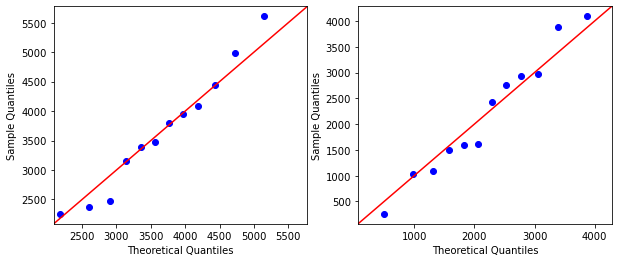

In [18]:
A.sort_values()
B.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(A,line='45',loc=meanA,scale=stdA,ax=ax2[0])
sm.qqplot(B,line='45',loc=meanB,scale=stdB,ax=ax2[1])
plt.show()

# Problem 1 Part 3,4,5.  
Now let's run the statistical test. We will look that using the Python library SciPy (that we imported as stats) and statsmodels (that we imported as sm).  We will run the hypothesis test and look at the 95% CI of the difference in means between the samples.  

In [19]:
stats.ttest_ind(A,B,equal_var=True)

Ttest_indResult(statistic=3.270464045523678, pvalue=0.0034985860084311795)

In [20]:
# 22 dof, n1+n2-2 = 12+12-2=22
sm.stats.ttest_ind(A,B,usevar='pooled')

(3.2704640455236778, 0.0034985860084311864, 22.0)

In [21]:
cm=sm.stats.CompareMeans(sm.stats.DescrStatsW(A),sm.stats.DescrStatsW(B))
print(cm.tconfint_diff(usevar='pooled'))

(543.8167280378224, 2428.8499386288445)


In [22]:
nA=len(A)
nB=len(B)
print("The number of observations in the samples are: " + str(nA)+" and " +str(nB))
print("The standard deviation of the sampes are: "+ str(stdA)+" and "+ str(stdB))
print("The mean of the samples are: "+ str(meanA) +" and "+str(meanB))
print("The varaince are the samples are: "+str(stdA**2)+" and "+ str(stdB**2))
print("The degrees of freedom are: "+ str(len(A)+len(B)-2))

The number of observations in the samples are: 12 and 12
The standard deviation of the sampes are: 1038.5666258664567 and 1183.1794479539465
The mean of the samples are: 3665.5 and 2179.1666666666665
The varaince are the samples are: 1078620.6363636365 and 1399913.6060606055
The degrees of freedom are: 22


In [23]:
s_pooled=np.sqrt((((nA-1)*stdA**2)+((nB-1)*stdB**2))/(nA+nB-2))
print("The pooled standard deviation of the samples is:  "+str(s_pooled))

The pooled standard deviation of the samples is:  1113.223751638511


In [24]:
StandErrorDiff=s_pooled*(np.sqrt(1/12+1/12))
print("The standard error of the difference is: "+str(StandErrorDiff))

The standard error of the difference is: 454.4716935101901


In [25]:
Critical_t=stats.t.ppf(0.975,22)
print(Critical_t)

2.0738730679040147


In [26]:
print("The difference in means is:" + str(meanA-meanB))

The difference in means is:1486.3333333333335


In [27]:
1/(np.sqrt(12))

0.2886751345948129

Hypothesis test; Part 3

Null hypthesis= u1=u2 \
Alternative hypothesis = u1 $\neq$ u2

alpha level = 0.05, two sided test

test statistic = 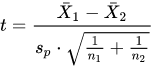 

critical t = t at dof= n1+n2-2 =22 and at 1-alpha/2 = 2.074
Go to the t-table and find the 0.975 probability at dof=22; t=2.074

If the test statistic is more extreme than the critical value, then you have a significant differnce. 

The p-value is found at the probability of being at or more exteme than the test statistic, doubled for the 2-tailed test. 

Go to the t-table and find the probability at or above t=3.27 at dof=22. This is between 0.0005 and 0.005, so dobling this for a two tailed test is between 0.001 and 0.01.  The exact p-value is 0.0035.  

In [28]:
test_statistic = (meanA-meanB) / (s_pooled*np.sqrt(1/12+1/12))
test_statistic

3.270464045523678

In [29]:
stats.t.ppf(0.975,22)

2.0738730679040147

In [30]:
1-(stats.t.cdf(3.27,22))

0.0017512158815846668

In [31]:
2*(1-(stats.t.cdf(3.27,22)))

0.0035024317631693336

In [32]:
stats.t.cdf(-3.27,22)

0.0017512158815846397

# 95% CI of each of the sample means; Part 4 
𝑥¯−𝑐𝑡∗𝑠(√𝑛)<=𝜇<=𝑥¯+𝑐𝑡∗𝑠(√𝑛

where $\bar{x}$ is the sample mean \
where $c_n$ is the critical value of z using the standard normal probability distribution at a certain confidence level \
where $\sigma$ is the known population standard deviation \
where n is the sample size

In [33]:
import statsmodels as sm
CI_tA=sm.stats.weightstats._tconfint_generic(meanA,stdA/np.sqrt(12),11,0.05,alternative='two-sided')
CI_tA

(3005.6262476537972, 4325.373752346202)

In [34]:
meanA+(stats.t.ppf(0.975,11))*stdA/np.sqrt(12)

4325.373752346202

In [35]:
meanA-(stats.t.ppf(0.975,11))*stdA/np.sqrt(12)

3005.6262476537972

In [36]:
meanB-(stats.t.ppf(0.975,11))*stdB/np.sqrt(12)

1427.4103107670967

In [37]:
meanB+(stats.t.ppf(0.975,11))*stdA/np.sqrt(12)

2839.0404190128693

In [38]:
CI_tB=sm.stats.weightstats._tconfint_generic(meanB,stdB/np.sqrt(12),11,0.05,alternative='two-sided')
CI_tB

(1427.4103107670967, 2930.9230225662363)

each 95%CI does not cross each other and sample A is higher than sample B so we know this is a significnat differece.

# 95% CI of the difference in mean; Part 5

In [39]:
LB=(meanA-meanB) - Critical_t*s_pooled* (np.sqrt(1/12 + 1/12))
UB=(meanA-meanB) + Critical_t*s_pooled* (np.sqrt(1/12 + 1/12))
print(LB)
print(UB)

543.8167280378224
2428.8499386288445


Interpretation:  the confidence interval for meanA-meanB (the difference in sample means) does not cross 0 and has a positive range of values.  The shows that mean A is greater than mean B, and that the difference in means is statistically significant at the 95% confidence level, with p=0.0035.  

# Power and Sample Size, Part 6

In [40]:
import statsmodels.stats.power as smp
# solve for power
smp.tt_ind_solve_power(effect_size=(1486.333/1113),nobs1=12,alpha=0.05,alternative='two-sided',ratio=1)

0.8780754120890645

In [41]:
# solve for power for a smaller effect (difference in means)
smp.tt_ind_solve_power(effect_size=(1000/1113),nobs1=12,alpha=0.05,alternative='two-sided',ratio=1)

0.5573672145184558

In [42]:
# solve for n
smp.tt_ind_solve_power(effect_size=(1000/1113),power=.9,alpha=0.05,alternative='two-sided',ratio=1)

27.030027493361164

power = probability( -t(at 0.975 and dof=22) + ES) \
ES= diff means / standard error estimate = 1486.333/(1113*sqrt(1/12+1/12)) = 3.271 \
power = probability (-2.07+3.271 = 1.201) = 0.879

power = probability (-1.96+3.271 = 1.311) = 0.91

In [43]:
stats.t.ppf(0.975,22)

2.0738730679040147

In [44]:
1486.333/ (1113*np.sqrt(1/12+1/12))

3.2711207887332883

In [45]:
stats.t.cdf(1.201,22)

0.8787387368705362

In [46]:
stats.norm.cdf(1.311)

0.9050711181947337

Sample size = n = 2* standard deviation ^2 * (z at 1-alpha + z at 1-beta)^2 / (mean1-mean2)^2

difference in means= 1000 \
standard deviation = sp= 1113, assume equal variance \
alpha =0.05 \
beta= 0.10, power = 0.9 \
z at 1-aplha/2 for 2-sided test = 1.96 \
z at 0.90 = 1.282

n= 2* (1113)^2 * (1.96+1.282) ^2 / (1000)^2 = 2477538*10.511 / 1000000= 26.041 or 27 in each sample

In [47]:
stats.norm.ppf(.90)

1.2815515655446004

In [48]:
smp.zt_ind_solve_power(effect_size=(1000/1113),alpha=0.05, power=0.9,ratio=1,alternative='two-sided')

26.032531051540605

# Problem 2 
Part A:  two sample unpaired test

Load the data and explore the data

In [66]:
A1=pd.Series([3,2,3,3,3,2,3])
B1=pd.Series([9,6,7,3,4,4,6,4,6,1,4,3,2,5])
frame={"FT":A1.append(B1),"ImageGuided":([1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])}
C1=pd.DataFrame(frame)
print(C1)

    FT  ImageGuided
0    3            1
1    2            1
2    3            1
3    3            1
4    3            1
5    2            1
6    3            1
0    9            0
1    6            0
2    7            0
3    3            0
4    4            0
5    4            0
6    6            0
7    4            0
8    6            0
9    1            0
10   4            0
11   3            0
12   2            0
13   5            0


<AxesSubplot:>

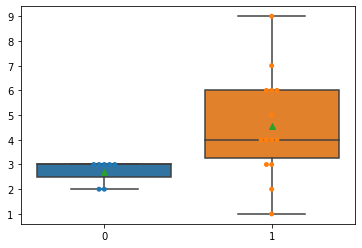

In [67]:
sns.boxplot(data=[A1,B1],showmeans=True)
sns.swarmplot(data=[A1,B1])

<AxesSubplot:xlabel='ImageGuided', ylabel='FT'>

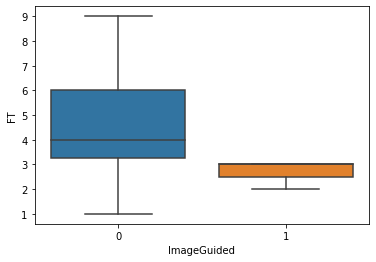

In [68]:
sns.boxplot(x="ImageGuided",y="FT",data=C1)

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


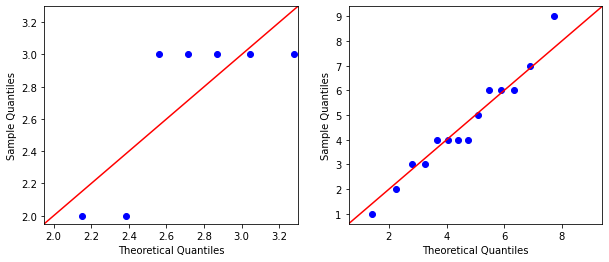

In [72]:
import statsmodels.api as sm
A1.sort_values()
B1.sort_values()
fig3,ax3=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(A1,line='45',loc=(np.mean(A1)),scale=(np.std(A1,ddof=1)),ax=ax3[0])
sm.qqplot(B1,line='45',loc=(np.mean(B1)),scale=(np.std(B1,ddof=1)),ax=ax3[1])
plt.show()

We are going to assume that we know that the populations that the samples are from are known tho be normal.  It does not look like sample A is normal or that the standard deviations are equivalent, so we will run a Welch's t-test for unequal variances (by having equal_var=False in the SciPy ttest_ind test.

In [73]:
# sample A1 not normal
stats.shapiro(A1)

ShapiroResult(statistic=0.6003988981246948, pvalue=0.0002751768915913999)

In [74]:
# sample variances not equal
stats.levene(A1,B1,center='median')

LeveneResult(statistic=5.079207920792079, pvalue=0.03621905322315552)

Problem 2 Part 3
95% CI's for each sample

In [75]:
# For the sample A1 recovery times using image guided surgery
print(np.mean(A1))
print(np.std(A1,ddof=1))
print(np.std(A1,ddof=1)/np.sqrt(len(A1)))
print(stats.sem(A1))
print(len(A1)-1)

2.7142857142857144
0.4879500364742666
0.18442777839082938
0.18442777839082938
6


In [76]:
stats.ttest_1samp(A1,0)

Ttest_1sampResult(statistic=14.717336715588184, pvalue=6.182550105795612e-06)

In [77]:
A1CI=stats.t.interval(alpha=0.95,df=(len(A1)-1), loc=np.mean(A1), scale=stats.sem(A1))
print(A1CI)

(2.2630071980948676, 3.165564230476561)


In [78]:
np.mean(A1)-2.263

0.4512857142857145

In [79]:
3.1656-np.mean(A1)

0.45131428571428556

In [80]:
# you can also use the statsmodel stats call
sm.stats.DescrStatsW(A1).tconfint_mean()

(2.2630071980948676, 3.165564230476561)

In [81]:
# For the sample B1 recovery times using conventional surgery
stats.t.interval(alpha=0.95,df=(len(B1)-1), loc=np.mean(B1), scale=stats.sem(B1))

(3.357882747008226, 5.784974395848916)

Given the confidence intervals, we can compare them to one another.  It is of note that if the 2 CIs do overlap, then you could still have a significant t-test stating that the differnece in the means is significantly different (rare but possible), but if the CIs of the samples do not overlap then the difference in means will be significant.

<AxesSubplot:xlabel='ImageGuided', ylabel='FT'>

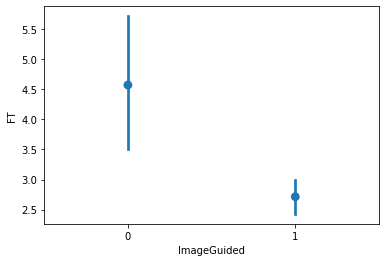

In [82]:
sns.pointplot(x="ImageGuided",y="FT", data=C1,ci=95, join=False)

In [83]:
# run the Welch's t-test since sample variances are not equal
stats.ttest_ind(A1,B1,equal_var=False)

Ttest_indResult(statistic=-3.14114094988841, pvalue=0.006485417016529633)

Problem 2 part 5

In [85]:
stats.ranksums(A1,B1)

RanksumsResult(statistic=-2.3127460005542715, pvalue=0.020736608272804612)

In [87]:
stats.mannwhitneyu(A1,B1,use_continuity=False,method='exact')

MannwhitneyuResult(statistic=18.0, pvalue=0.02000343997248022)

In [88]:
stats.mannwhitneyu(A1,B1,use_continuity=False,method='auto')

MannwhitneyuResult(statistic=18.0, pvalue=0.017768935079313722)

In [91]:
print(A1.sort_values())

1    2
5    2
0    3
2    3
3    3
4    3
6    3
dtype: int64


In [92]:
print(B1.sort_values())

9     1
12    2
3     3
11    3
4     4
5     4
7     4
10    4
13    5
1     6
6     6
8     6
2     7
0     9
dtype: int64


In [117]:
3+3+8+8+8+8

38

In [108]:
10/2

5.0

In [118]:
1+3+8+8+13.5+13.5+13.5+13.5+16+18+18+18+20+21

185.0

In [119]:
U1=7*14+7*(8)/2-38
U1

88.0

In [120]:
U2=7*14+14*(15)/2-185
U2

18.0

look up the U value for n=7 and n=14 in U table:  this U=22 for a 0.05 significance level
Since our calculated U is less than this U value then we do reject the null hypotheiss and accept that the the populations are different.  

# Problem 3 Part A

In [162]:
#read paired data
A3=[7,3,3,4,8,3,2,9,5,4]
B3=[6,3,5,3,8,2,4,9,4,5]

<AxesSubplot:>

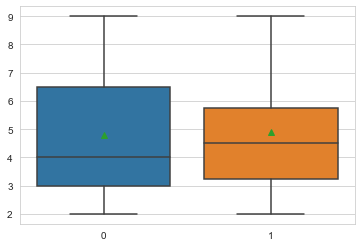

In [163]:
sns.boxplot(data=[A3,B3],showmeans=True)

In [182]:
# t-test related
stats.ttest_rel(A3,B3,alternative='two-sided')

Ttest_relResult(statistic=-0.26413527189768715, pvalue=0.7976245209721027)

In [183]:
diffs=[]
diffs=np.array(A3)-np.array(B3)
print(diffs)

[ 1  0 -2  1  0  1 -2  0  1 -1]


In [184]:
# note that the differences of the paired data are not normal, as per the Shapiro Wilks test, 
# so a non-parametric test is appropriate to run if you do not assume normality
stats.shapiro(diffs)

ShapiroResult(statistic=0.8236138224601746, pvalue=0.02802291512489319)

In [185]:
stats.wilcoxon(A3,B3,alternative='two-sided')

C:\Users\nabil\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\nabil\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=12.0, pvalue=0.7252134073972734)

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


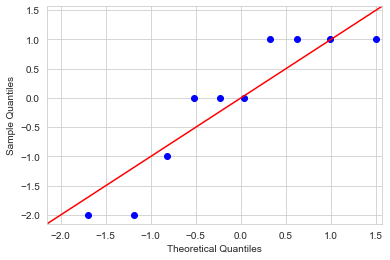

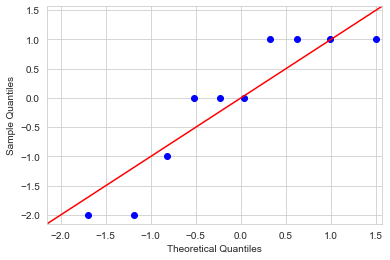

In [186]:
sm.qqplot(np.sort(diffs),line='45',loc=np.mean(diffs),scale=np.std(diffs,ddof=1))

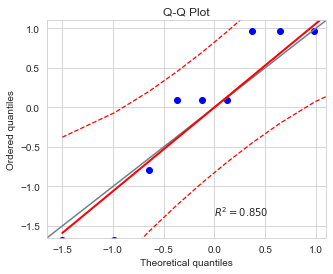

In [187]:
import pingouin as pg
sns.set_style('whitegrid')
ax=pg.qqplot(diffs,dist='norm')

In [188]:
meandiffs=np.mean(diffs)
print(meandiffs)

-0.1


In [189]:
sdmeandiffs=np.std(diffs,ddof=1)
print(sdmeandiffs)

1.1972189997378648


In [190]:
semeans=sdmeandiffs/(np.sqrt(10))
print(semeans)

0.37859388972001823


In [191]:
#t_paired=mean of differences / se_differences = mean of differences / sd_mean of differences/ sqrt(sample size of paired observations)
t_stat_diff=np.mean(diffs)/(sdmeandiffs/np.sqrt(10))
print(t_stat_diff)

-0.26413527189768715


In [192]:
stats.t.interval(alpha=.95,df=9, loc=-.1,scale=semeans)

(-0.9564388794001123, 0.7564388794001123)

In [193]:
Critical_t=stats.t.ppf(0.975,9)
print(Critical_t)

2.2621571627409915


In [194]:
-.1 - Critical_t*semeans

-0.9564388794001123

In [198]:
-.1 + Critical_t*semeans

0.7564388794001123

In [210]:
stats.t.cdf(-0.264,df=9)

0.39886276366589174

In [211]:
2*(stats.t.cdf(-0.264,df=9))

0.7977255273317835